In [1]:
#import  the libraries
import torch
import time
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, ConcatDataset
import torch.optim.lr_scheduler as lr_scheduler
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

100%|██████████| 561753746/561753746 [00:04<00:00, 130693995.24it/s]


Extracting ./data/EMNIST/EMNIST/raw/gzip.zip to ./data/EMNIST/EMNIST/raw


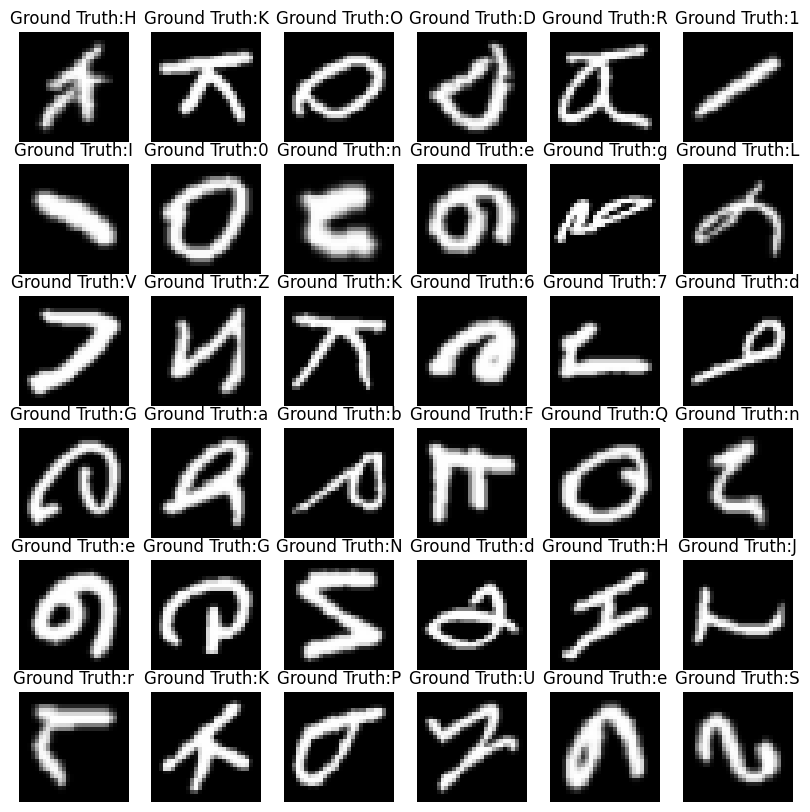

In [2]:
train_set = torchvision.datasets.EMNIST(root = './data/EMNIST', download = True, split = 'balanced',
                                              train = True, transform = transforms.Compose([transforms.ToTensor(),]))

test_set = torchvision.datasets.EMNIST(root = './data/EMNIST', download=True, split = 'balanced',
                                             train=False, transform = transforms.Compose([transforms.ToTensor()]))

dataset = ConcatDataset([train_set, test_set])
# Visulize some figures
figure = plt.figure(figsize=(10, 10))
cols, rows = 6, 6
mapper = {}
path = '/content/drive/MyDrive/University_of_liverpool/AppliedAI/Assignment/emnist-balanced-mapping.txt'
with open(path) as f:
    for line in f:
       (key, val) = line.split()
       mapper[int(key)] = int(val)
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    img, label = train_set[sample_idx]
    figure.add_subplot(rows, cols, i)
    # plt.title("Label "+ str(label))
    plt.title("Ground Truth:{}".format(chr(mapper[label])))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    
# plt.show()


In [3]:
# DataLoader with the batch_size
print("Training data size: {}".format(len(train_set)))
train_size=len(train_set)
test_size=len(test_set)
print("Training data size: {}".format(len(test_set)))

train_loader = torch.utils.data.DataLoader(train_set,batch_size=20)

test_loader = torch.utils.data.DataLoader(test_set,batch_size=10000)

Training data size: 112800
Training data size: 18800


# MLP

In [4]:
epochs = 15
n_hidden = 3
# Baseline Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 47),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# define the model
model = MLP()

print(model)

# epochs = 15
# n_hidden = 3
# # Baseline Model
# class MLP(nn.Module):
#     def __init__(self, n_hidden = 3, scheduler = None, activation = None, optimizers = None, batch = False, L1 = False, L2 = False, Dropout = False):
#         super(MLP, self).__init__()
#         self.flatten = nn.Flatten()
#         layers = []
#         layers.append(nn.Linear(28*28, 512))
#         if Dropout:
#           layers.append(nn.Dropout(0.2))
#         for i in range(n_hidden):
#           if activation == 'elu':
#               layers.append(nn.ELU(0.1))
#           elif activation == 'leaky':
#             layers.append(nn.LeakyReLU(0.1))
#           elif activation == 'selu':
#             layers.append(nn.SELU(0.1))
#             layers.append(nn.Linear(512, 512))
#           if batch:
#             layers.append(nn.BatchNorm1d(512))
#           if L1:
#                 layers.append(nn.L1Loss())
#           if L2:
#               layers.append(nn.MSELoss())
#         layers.append(nn.Linear(512, 47))
#         self.linear_relu_stack = nn.Sequential(*layers)

#     def forward(self, x):
#         x = self.flatten(x)
#         logits = self.linear_relu_stack(x)
#         return logits
#     def get_optimizer(self, lr):
#         optimizer = torch.optim.Adam(self.parameters(), lr=lr)
#         if self.scheduler_type == 'step':
#             scheduler = lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)
#         elif self.scheduler_type == 'exponential':
#             scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
#         else:
#             scheduler = None
#         return optimizer, scheduler

# # define the model
# model = MLP()

# print(model)

MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=47, bias=True)
  )
)


In [ ]:
!pip install skorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import torch
# import torch.nn as nn
# from sklearn.model_selection import GridSearchCV
# from skorch import NeuralNetClassifier
# # Define MLP class
# class MLP(nn.Module):
#     def __init__(self, n_hidden, scheduler, activation, optimizers, batch=False, L1=False, L2=False):
#         super(MLP, self).__init__()
#         self.flatten = nn.Flatten()
#         layers = []
#         layers.append(nn.Linear(28*28, 512))
#         for i in range(n_hidden):
#             if activation == 'elu':
#                 layers.append(nn.ELU(0.1))
#             elif activation == 'leaky':
#                 layers.append(nn.LeakyReLU(0.1))
#             elif activation == 'selu':
#                 layers.append(nn.SELU(0.1))
#             layers.append(nn.Linear(512, 512))
#             if batch:
#                 layers.append(nn.BatchNorm1d(512))
#             # if Dropout:
#             #     layers.append(nn.Dropout(0.2))
#         layers.append(nn.ReLU())
#         layers.append(nn.Linear(512, 47))
#         self.linear_relu_stack = nn.Sequential(*layers)
#         self.L1 = L1
#         self.L2 = L2

#     def forward(self, x):
#         x = self.flatten(x)
#         logits = self.linear_relu_stack(x)
#         return logits

#     def l1_regularization(self, factor):
#         l1 = torch.tensor(0, dtype=torch.float32)
#         for p in self.parameters():
#             l1 += torch.norm(p, 1)
#         return factor * l1

#     def l2_regularization(self, factor):
#         l2 = torch.tensor(0, dtype=torch.float32)
#         for p in self.parameters():
#             l2 += torch.norm(p, 2)
#         return factor * l2

# def train_model(model, optimizer, criterion, train_loader, device):
#     model.train()
#     running_loss = 0.0
#     for batch_idx, (data, target) in enumerate(train_loader):
#         data, target = data.to(device), target.to(device)
#         optimizer.zero_grad()
#         output = model(data)
#         loss = criterion(output, target)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
#     return running_loss / len(train_loader)

# # Define hyperparameters for GridSearchCV
# params = {
#     'n_hidden': [2, 3, 4],
#     'batch': [True, False],
#     'L1': [True, False],
#     'L2': [True, False],
#     # 'Dropout': [True, False],
#     'scheduler': ['step', 'exp'],
#     'activation': ['elu', 'leaky', 'selu'],
#     'optimizers': [torch.optim.SGD, torch.optim.Adam, torch.optim.Adagrad]
# }

# # Define dataset and dataloader
# # ...

# # Define device
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# # Create MLP instance
# model = MLP(n_hidden=3, scheduler=None, activation='relu', optimizers=torch.optim.SGD)

# # Define criterion and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
# net = NeuralNetClassifier(
#     module = MLP,
#     criterion=criterion,
#     optimizer=optimizer,
#     device=device,
#     iterator_train__shuffle=True,
# )

# # Define GridSearchCV instance
# clf = GridSearchCV(net, params, scoring='accuracy', n_jobs=-1, cv=2)
# train_data = next(iter(train_loader))
# X_train, y_train = train_data[0], train_data[1]
# # Fit the data
# clf.fit(X_train, y_train, train_loader=train_loader)

In [52]:
#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
# define learning rate
learning_rate = 0.01
# set the epoch
epochs = 15


# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
# for i in range(epochs):
#   correct = 0
#   for j,(images,targets) in enumerate(train_loader):
    
#     #making predictions
#     y_pred = model(images)
  
#     #calculating loss
#     loss = criterion(y_pred,targets.reshape(-1))
#     #backprop
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
#     correct+= (y_pred.argmax(axis = 1) == targets).float().sum()
#   if i>10:
#     optimizer.lr = 0.0005
#   accuracy = 100* correct/len(train_set)
#   print(loss)
#   print(accuracy)
#   losses.append(loss)
#   accuracies.append(accuracy)

# print('Complete Training')
k_folds = 3
kfold = KFold(n_splits=k_folds, shuffle=True)
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=20, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=1000, sampler=test_subsampler)
    model = MLP()
    model.apply(reset_weights)
        # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    for i in range(epochs):
        correct = 0
        training_start_time = time.time()
        for j,(images,targets) in enumerate(trainloader):
            #making predictions
            y_pred = model(images)
            #calculating loss
            loss = criterion(y_pred,targets.reshape(-1))
            #backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            correct += (y_pred.argmax(axis = 1) == targets).float().sum()
        accuracy = 100 * correct / len(train_set)
        # if i>10:
        #   optimizer.lr = 0.0005
        print(loss)
        print(accuracy)
        losses.append(loss)
        accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    print(f'accuracy during training is {accuracy.item()}')
    print(f"loss after training is {loss.item()}")

FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=784, out_features=512, bias=True)
Reset trainable parameters of layer = Linear(in_features=512, out_features=512, bias=True)
Reset trainable parameters of layer = Linear(in_features=512, out_features=512, bias=True)
Reset trainable parameters of layer = Linear(in_features=512, out_features=47, bias=True)
tensor(2.0962, grad_fn=<NllLossBackward0>)
tensor(16.8422)


KeyboardInterrupt: ignored

In [49]:
k_folds = 3
kfold = KFold(n_splits=k_folds, shuffle=True)
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Define data loaders for training and testing data in this fold
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=20, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=1000, sampler=test_subsampler)

    model = MLP()
    model.apply(reset_weights)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()
    losses = []
    accuracies = []

    for i in range(epochs):
        correct = 0
        training_start_time = time.time()
        for j, (images, targets) in enumerate(trainloader):
            #making predictions
            y_pred = model(images)
            #calculating loss
            loss = criterion(y_pred, targets)
            #backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            correct += (y_pred.argmax(axis = 1) == targets).float().sum()
            if j == 0 and i > 10:
                optimizer.lr = 0.0005
        accuracy = 100 * correct / len(train_ids)
        print(loss)
        print(accuracy)
        losses.append(loss.item())
        accuracies.append(accuracy.item())

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    print(f'accuracy during training is {accuracies[-1]}')
    print(f"loss after training is {losses[-1]}")


FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=784, out_features=512, bias=True)
Reset trainable parameters of layer = Linear(in_features=512, out_features=512, bias=True)
Reset trainable parameters of layer = Linear(in_features=512, out_features=512, bias=True)
Reset trainable parameters of layer = Linear(in_features=512, out_features=47, bias=True)
tensor(1.8606, grad_fn=<NllLossBackward0>)
tensor(24.7739)
tensor(0.9617, grad_fn=<NllLossBackward0>)
tensor(60.2979)
tensor(0.8589, grad_fn=<NllLossBackward0>)
tensor(69.4987)


KeyboardInterrupt: ignored

In [5]:
#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
k_folds = 3
kfold = KFold(n_splits=k_folds, shuffle=True)
# define learning rate
learning_rate = 0.005
# set the epoch
epochs = 15


# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=20, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=1000, sampler=test_subsampler)
    model = MLP()
    model.apply(reset_weights)
        # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    for i in range(epochs):
      correct = 0
      training_start_time = time.time()
      for j,(images,targets) in enumerate(train_loader):
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      accuracy = 100 * correct / len(train_set)
      if i>10:
        optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    print(f'accuracy during training is {accuracy.item()}')
    print(f"loss after training is {loss.item()}")
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')

FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=784, out_features=512, bias=True)
Reset trainable parameters of layer = Linear(in_features=512, out_features=512, bias=True)
Reset trainable parameters of layer = Linear(in_features=512, out_features=512, bias=True)
Reset trainable parameters of layer = Linear(in_features=512, out_features=47, bias=True)
tensor(2.4041, grad_fn=<NllLossBackward0>)
tensor(16.5541)
tensor(1.6590, grad_fn=<NllLossBackward0>)
tensor(55.5612)
tensor(1.5123, grad_fn=<NllLossBackward0>)
tensor(65.8892)
tensor(1.3271, grad_fn=<NllLossBackward0>)
tensor(71.2278)
tensor(1.1667, grad_fn=<NllLossBackward0>)
tensor(74.8032)
tensor(1.0369, grad_fn=<NllLossBackward0>)
tensor(77.1871)
tensor(0.9497, grad_fn=<NllLossBackward0>)
tensor(78.9672)
tensor(0.8778, grad_fn=<NllLossBackward0>)
tensor(80.2934)
tensor(0.8124, grad_fn=<NllLossBackward0>)
tensor(81.3103)
tensor(0.7601, grad_fn=<NllLossBackward0>)
tensor(82.1924)
tensor(

KeyboardInterrupt: ignored

## Loss function and Accuracy Graph



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

## Adaptive Learning rate

### Step based scheduler

In [6]:
import numpy as np
import matplotlib.pyplot as plt
lrs = []



# loop over the dataset multiple times
losses = []
accuracies = []
#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
k_folds = 3
kfold = KFold(n_splits=k_folds, shuffle=True)
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = MLP()
    model.apply(reset_weights)
    #  you can set epoch size
    epochs = 15
    # define learning rate
    learning_rate = 0.05
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    # Step based scheduling method
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)
    for i in range(epochs):
      correct = 0
      for j,(images,targets) in enumerate(train_loader):
        
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      scheduler.step()
      lrs.append(optimizer.param_groups[0]["lr"])
      accuracy = 100 * correct / len(train_set)
      # if i>10:
      #   optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    print(f'accuracy during training is {accuracy.item()}')
    print(f"loss after training is {loss.item()}")
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')
# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

plt.plot([lr for lr in lrs])
plt.show()

print(lrs)

FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=784, out_features=512, bias=True)
Reset trainable parameters of layer = Linear(in_features=512, out_features=512, bias=True)
Reset trainable parameters of layer = Linear(in_features=512, out_features=512, bias=True)
Reset trainable parameters of layer = Linear(in_features=512, out_features=47, bias=True)
tensor(0.9662, grad_fn=<NllLossBackward0>)
tensor(62.7606)


KeyboardInterrupt: ignored

tensor(3.8508, grad_fn=<NllLossBackward0>)
tensor(2.0576)
tensor(3.8508, grad_fn=<NllLossBackward0>)
tensor(2.0576)
tensor(3.8508, grad_fn=<NllLossBackward0>)
tensor(2.0576)
tensor(3.8508, grad_fn=<NllLossBackward0>)
tensor(2.0576)


KeyboardInterrupt: ignored

### Exponenential scheduler

In [7]:

lrs = []
import numpy as np
import matplotlib.pyplot as plt
#  you can set epoch size

# define learning rate
learning_rate = 0.05
# define your optimizer with SGD and learning rate
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
# define the loss function
criterion = nn.CrossEntropyLoss()
# Step based scheduling method
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)
lrs = []
# loop over the dataset multiple times
losses = []
accuracies = []
#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
k_folds = 5
kfold = KFold(n_splits=k_folds, shuffle=True)
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = MLP()
    model.apply(reset_weights)
    #  you can set epoch size
    epochs = 15
    # define learning rate
    learning_rate = 0.05
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    # set the epoch
    # Step based scheduling method
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.1)
    for i in range(epochs):
      correct = 0
      for j,(images,targets) in enumerate(train_loader):
        
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lrs.append(optimizer.param_groups[0]["lr"])
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      scheduler.step()
      accuracy = 100 * correct / len(train_set)
      # if i>10:
      #   optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Complete Training')

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    print(f'accuracy during training is {accuracy.item()}')
    print(f"loss after training is {loss.item()}")
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')

import numpy as np
import matplotlib.pyplot as plt

# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

plt.plot([lr for lr in lrs])
plt.show()

print(lrs)

FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=784, out_features=512, bias=True)
Reset trainable parameters of layer = Linear(in_features=512, out_features=512, bias=True)
Reset trainable parameters of layer = Linear(in_features=512, out_features=512, bias=True)
Reset trainable parameters of layer = Linear(in_features=512, out_features=47, bias=True)
tensor(0.9980, grad_fn=<NllLossBackward0>)
tensor(62.4326)
tensor(0.6566, grad_fn=<NllLossBackward0>)
tensor(82.3298)


KeyboardInterrupt: ignored

## Activation function

### Leaky Relu

In [8]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.1),
            nn.Linear(512, 512),
            nn.LeakyReLU(0.1),
            nn.Linear(512, 512),
            nn.LeakyReLU(0.1),
            nn.Linear(512, 512),
            nn.LeakyReLU(0.1),
            nn.Linear(512, 47),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# define the model
model_leaky = MLP()
print(model_leaky)
#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
k_folds = 3
kfold = KFold(n_splits=k_folds, shuffle=True)
# define learning rate
epochs = 15


# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = MLP()
    model.apply(reset_weights)
    learning_rate = 0.005
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    # set the epoch
    for i in range(epochs):
      correct = 0
      training_start_time = time.time()
      for j,(images,targets) in enumerate(train_loader):
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      accuracy = 100 * correct / len(train_set)
      if i>10:
        optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    print(f'accuracy during training is {accuracy.item()}')
    print(f"loss after training is {loss.item()}")
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')

import numpy as np
import matplotlib.pyplot as plt

# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.1)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.1)
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): LeakyReLU(negative_slope=0.1)
    (6): Linear(in_features=512, out_features=512, bias=True)
    (7): LeakyReLU(negative_slope=0.1)
    (8): Linear(in_features=512, out_features=47, bias=True)
  )
)
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=784, out_features=512, bias=True)
Reset trainable parameters of layer = Linear(in_features=512, out_features=512, bias=True)
Reset trainable parameters of layer = Linear(in_features=512, out_features=512, bias=True)
Reset trainable parameters of layer = Linear(in_features=512, out_features=512, bias=True)
Reset trainable parameters of layer = L

KeyboardInterrupt: ignored

### ELU

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ELU(0.1),
            nn.Linear(512, 512),
            nn.ELU(0.1),
            nn.Linear(512, 512),
            nn.ELU(0.1),
            nn.Linear(512, 512),
            nn.ELU(0.1),
            nn.Linear(512, 47),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# define the model
model_elu = MLP()

print(model_elu)
#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
k_folds = 3
kfold = KFold(n_splits=k_folds, shuffle=True)
# set the epoch
epochs = 15


# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = MLP()
    model.apply(reset_weights)
    # define learning rate
    learning_rate = 0.005
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    for i in range(epochs):
      correct = 0
      training_start_time = time.time()
      for j,(images,targets) in enumerate(train_loader):
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      accuracy = 100 * correct / len(train_set)
      if i>10:
        optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    print(f'accuracy during training is {accuracy.item()}')
    print(f"loss after training is {loss.item()}")
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')

import numpy as np
import matplotlib.pyplot as plt

# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

### SELU

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.SELU(0.1),
            nn.Linear(512, 512),
            nn.SELU(0.1),
            nn.Linear(512, 512),
            nn.SELU(0.1),
            nn.Linear(512, 512),
            nn.SELU(0.1),
            nn.Linear(512, 47),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# define the model
model_selu = MLP()

print(model_selu)
#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
k_folds = 3
kfold = KFold(n_splits=k_folds, shuffle=True)
# set the epoch
epochs = 15


# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = MLP()
    model.apply(reset_weights)
    # define learning rate
    learning_rate = 0.005
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    for i in range(epochs):
      correct = 0
      training_start_time = time.time()
      for j,(images,targets) in enumerate(train_loader):
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      accuracy = 100 * correct / len(train_set)
      if i>10:
        optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    print(f'accuracy during training is {accuracy.item()}')
    print(f"loss after training is {loss.item()}")
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')

import numpy as np
import matplotlib.pyplot as plt

# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

## Optimizers

### Adam

In [ ]:
#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
k_folds = 3
kfold = KFold(n_splits=k_folds, shuffle=True)
# define learning rate
# set the epoch
epochs = 15


# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = MLP()
    model.apply(reset_weights)
    learning_rate = 0.005
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    for i in range(epochs):
      correct = 0
      training_start_time = time.time()
      for j,(images,targets) in enumerate(train_loader):
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      accuracy = 100 * correct / len(train_set)
      if i>10:
        optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    print(f'accuracy during training is {accuracy.item()}')
    print(f"loss after training is {loss.item()}")
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')
import numpy as np
import matplotlib.pyplot as plt

# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

### Adagrad

In [ ]:
#  you can set epoch size

#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
k_folds = 3
kfold = KFold(n_splits=k_folds, shuffle=True)
# set the epoch
epochs = 15


# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = MLP()
    model.apply(reset_weights)
    # define learning rate
    learning_rate = 0.005
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.Adagrad(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    for i in range(epochs):
      correct = 0
      training_start_time = time.time()
      for j,(images,targets) in enumerate(train_loader):
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      accuracy = 100 * correct / len(train_set)
      if i>10:
        optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    print(f'accuracy during training is {accuracy.item()}')
    print(f"loss after training is {loss.item()}")
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')
  import numpy as np
import matplotlib.pyplot as plt

# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

## Batch Normalization

### With Batch Normalization

In [ ]:
# Baseline Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 47),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# define the model
model_batch = MLP()

print(model_batch)     

#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
k_folds = 3
kfold = KFold(n_splits=k_folds, shuffle=True)
# set the epoch
epochs = 15


# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = MLP()
    model.apply(reset_weights)
        # define learning rate
    learning_rate = 0.005
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    for i in range(epochs):
      correct = 0
      training_start_time = time.time()
      for j,(images,targets) in enumerate(train_loader):
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      accuracy = 100 * correct / len(train_set)
      if i>10:
        optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    print(f'accuracy during training is {accuracy.item()}')
    print(f"loss after training is {loss.item()}")
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')
import numpy as np
import matplotlib.pyplot as plt

# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

### Without Batch Normalization

## L1 and L2 regularization#

### L1 Regularization

In [ ]:

#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
k_folds = 3
kfold = KFold(n_splits=k_folds, shuffle=True)
# set the epoch
epochs = 15


# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = MLP()
    model.apply(reset_weights)
    # define learning rate
    learning_rate = 0.005
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    for i in range(epochs):
      correct = 0
      training_start_time = time.time()
      for j,(images,targets) in enumerate(train_loader):
        l1_lambda = 0.001
        l1_reg = torch.tensor(0., requires_grad=True)
        for name, param in model.named_parameters():
            if 'weight' in name:
                l1_reg = l1_reg + torch.norm(param, 1)
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      accuracy = 100 * correct / len(train_set)
      if i>10:
        optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    print(f'accuracy during training is {accuracy.item()}')
    print(f"loss after training is {loss.item()}")
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')

print('Complete Training')
# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

### L2 Regularization

In [ ]:

#  you can set epoch sizedef reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
k_folds = 3
kfold = KFold(n_splits=k_folds, shuffle=True)

# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = MLP()
    model.apply(reset_weights)
    # define learning rate
    learning_rate = 0.005
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    for i in range(epochs):
      correct = 0
      training_start_time = time.time()
      for j,(images,targets) in enumerate(train_loader):
        l2_lambda = 0.01
        l2_reg = torch.tensor(0., requires_grad=True)
        for name, param in model.named_parameters():
            if 'weight' in name:
                l2_reg = l2_reg + torch.norm(param, 2)
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      accuracy = 100 * correct / len(train_set)
      if i>10:
        optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    print(f'accuracy during training is {accuracy.item()}')
    print(f"loss after training is {loss.item()}")
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')


print('Complete Training')
# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

## Dropout

### With Dropout

In [ ]:
# Baseline Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(28*28, 512),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(512, 47),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# define the model
model_dropout = MLP()

print(model_dropout)     

#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
k_folds = 3
kfold = KFold(n_splits=k_folds, shuffle=True)
# set the epoch
epochs = 15


# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = MLP()
    model.apply(reset_weights)
    # define learning rate
    learning_rate = 0.005
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    for i in range(epochs):
      correct = 0
      training_start_time = time.time()
      for j,(images,targets) in enumerate(train_loader):
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      accuracy = 100 * correct / len(train_set)
      if i>10:
        optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    print(f'accuracy during training is {accuracy.item()}')
    print(f"loss after training is {loss.item()}")
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')
import numpy as np
import matplotlib.pyplot as plt

# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

In [ ]:
# Test the result on test data

# make a prediction for a sample randomly chose from the test dataset
# you can run this part repeatedly, see the classification result from the model
import random
rand_no = random.randint(0,10000)
print(rand_no)

x_test,y_test = next(iter(test_loader))

y_pred = (model(x_test).argmax(dim=1))

plt.imshow(x_test[rand_no].reshape(28,28),cmap='gray')

pred = model(x_test[rand_no].reshape(-1,1,28,28)).argmax()

print("Prediction is {}".format(pred))

# compute the accuracy



# compute the accuracy of the model

print("Accuracy is : ",(y_pred.eq(y_test).sum()/test_size).item()*100,"%")

In [ ]:
# Visulize some test figures
figure = plt.figure(figsize=(10, 10))
cols, rows = 6, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_set), size=(1,)).item()
    print("Prediction: {}".format(sample_idx))
    img, label = test_set[sample_idx]
    # print(img.shape)
    pred = model(img.reshape(-1,1,28,28)).argmax()
    figure.add_subplot(rows, cols, i)
    # plt.title("Label "+ str(label))
    plt.title("Prediction: {}".format(pred))
    
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
# we also can plot the Confusion Matrix
import pandas as pd
import torch.nn.functional as F

# accuracy function 
def testing_accuracy(model, data_loader):
    model.eval()
    test_loss = 0
    device = 'cpu'

    y_pred = []
    y_actu = []
    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            # get the index of the max log-probability
            pred = output.argmax(dim=1, keepdim=True)
            y_pred.extend(torch.flatten(pred).tolist()) 
            y_actu.extend(target.tolist())
           
    y_pred = pd.Series(y_pred, name='Actual')
    y_actu = pd.Series(y_actu, name='Predicted')
    cm = pd.crosstab(y_actu, y_pred)
    correct = sum([cm.iloc[i,i] for i in range(len(cm))])
    
    test_loss /= len(data_loader.dataset)
    accuracy = 100*correct/len(test_loader.dataset)

    return(test_loss, accuracy, cm)

test_results = testing_accuracy(model, test_loader)

print("- Test Loss: ", test_results[0], "\n")
print("- Accuracy: ", test_results[1], "\n")
print("- Confusion Matrix: \n \n",  test_results[2] )

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

conf_matrix = test_results[2].to_numpy()

fig, ax = plt.subplots(figsize=(10,6))
im = ax.imshow(conf_matrix)

ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        text = ax.text(j, i, conf_matrix[i, j],
                       ha="center", va="center", color="w")
        
ax.set_xlabel('Actual Labels')
ax.set_ylabel('Predicted Labels')
ax.set_title('Confusion Matrix')

In [ ]:
#  train on the GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)


# save the training model
PATH = './mnist_net.pth'
torch.save(model.state_dict(), PATH)


# CNN

In [ ]:
epochs = 15
# define the model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1,10,5)    # Convolutional layer
        self.conv2 = nn.Conv2d(10,20,3)

        self.fc1 = nn.Linear(20*10*10,500)
        self.fc2 = nn.Linear(500, 47)

    def forward(self, x):     
        input_size = x.size(0)
        # in: batch*1*28*28, out: batch*10*24*24(28-5+1)
        x = self.conv1(x)
        # out: batch*10*24*24
        x = F.relu(x)
        # in: batch*10*24*24, out: batch*10*12*12
        x = F.max_pool2d(x,2,2)

        # in: batch*10*12*12, out: batch*20*10*10 (12-3+1)
        x = self.conv2(x)
        x = F.relu(x)

        # 20*10*10 = 2000
        x = x.view(input_size,-1)

        # in: batch*2000  out:batch*500
        x = self.fc1(x)
        x = F.relu(x)

        # in:batch*500 out:batch*10
        x = self.fc2(x)
        return F.log_softmax(x)
    
# create the object for model CNN
net= CNN()
print(net)

In [ ]:
# define the parameters
learning_rate = 1e-3
batch_size = 60

#loss = F.nll_loss(output, target)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent

print(len(train_loader.dataset))
print(len(test_loader.dataset))

In [ ]:
#  train the model
correct = 0
loss_list = []
accuracy_list = []
for i in range(1,epochs+1):
   print(f"Epoch {i}\n-------------------------------")
   net.train()
   for batch_idx, (data, target) in enumerate(train_loader):
      
      optimizer.zero_grad()
      output = net(data)
      
      loss = F.nll_loss(output, target) # negative log likelihood loss used for classification
      loss.backward()
      optimizer.step()
   loss_list.append(loss.data)
   print('iteration: {}, \t loss: {}'.format(i, loss.item()))

In [ ]:
# plot the figure 
fig = plt.figure(figsize=(20, 10))

plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
correct = 0
# x_test,y_test = next(iter(test_loader))
# print(len(x_test))

for data, target in test_loader:

    outputs = net(data)
    _, predicted = torch.max(outputs.data, 1)

    correct += (predicted == target).sum().item()

    print('Test accuracy: {}/{} ({:.0f}%)\n'.format(correct, len(test_loader.dataset),
                                                    100. * correct / len(test_loader.dataset)))

In [ ]:
# save the training model
PATH2 = './mnist_net_CNN.pth'
torch.save(net.state_dict(), PATH2)

## Loss function and Accuracy Graph



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

## Adaptive Learning rate

### Step based scheduler

In [ ]:
# #  you can set epoch size

# # define learning rate
# learning_rate = 0.05
# # define your optimizer with SGD and learning rate
# optimizer = torch.optim.SGD(net.parameters(),lr=learning_rate)
# # define the loss function
# criterion = nn.CrossEntropyLoss()
# # Step based scheduling method
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)
# lrs = []



# # loop over the dataset multiple times
# losses = []
# accuracies = []
# for i in range(epochs):
#   correct = 0
#   for j,(images,targets) in enumerate(train_loader):
    
#     #making predictions
#     y_pred = net(images)
#     # print(f'predictions are {y_pred.argmax(axis = 1)}')
#     # print(f'targets are {targets}')
#     #calculating loss
#     loss = criterion(y_pred,targets.reshape(-1))
#     #backprop
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
#     correct += (y_pred.argmax(axis = 1) == targets).float().sum()
#   scheduler.step()
#   lrs.append(optimizer.param_groups[0]["lr"])
#   accuracy = 100 * correct / len(train_set)
#   # if i>10:
#   #   optimizer.lr = 0.0005
#   print(loss)
#   print(accuracy)
#   losses.append(loss)
#   accuracies.append(accuracy)

# print('Complete Training')
# import numpy as np
# import matplotlib.pyplot as plt

# # losses is the list of losses generated during training
# plt.plot([loss.detach().numpy() for loss in losses])
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training Loss')
# plt.show()
# # losses is the list of losses generated during training
# plt.plot([acc.detach().numpy() for acc in accuracies])
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Accuracy')
# plt.show()

# plt.plot([lr for lr in lrs])
# plt.show()

# print(lrs)
print(lrs)
import numpy as np
import matplotlib.pyplot as plt
#  you can set epoch size
epochs = 15
lrs = []



# loop over the dataset multiple times
losses = []
accuracies = []
#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
k_folds = 3
kfold = KFold(n_splits=k_folds, shuffle=True)
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = CNN()
    model.apply(reset_weights)
    # define learning rate
    learning_rate = 0.05
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    # Step based scheduling method
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)
    for i in range(epochs):
      correct = 0
      for j,(images,targets) in enumerate(train_loader):
        
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      scheduler.step()
      lrs.append(optimizer.param_groups[0]["lr"])
      accuracy = 100 * correct / len(train_set)
      # if i>10:
      #   optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Complete Training')

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    print(f'accuracy during training is {accuracy.item()}')
    print(f"loss after training is {loss.item()}")
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')
# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

plt.plot([lr for lr in lrs])
plt.show()

print(lrs)

### Exponenential scheduler

In [ ]:
# #  you can set epoch size

# # define learning rate
# learning_rate = 0.05
# # define your optimizer with SGD and learning rate
# optimizer = torch.optim.SGD(net.parameters(),lr=learning_rate)
# # define the loss function
# criterion = nn.CrossEntropyLoss()
# # set the epoch
# # Step based scheduling method
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.1)
# lrs = []



# # loop over the dataset multiple times
# losses = []
# accuracies = []
# for i in range(epochs):
#   correct = 0
#   for j,(images,targets) in enumerate(train_loader):
    
#     #making predictions
#     y_pred = net(images)
#     # print(f'predictions are {y_pred.argmax(axis = 1)}')
#     # print(f'targets are {targets}')
#     #calculating loss
#     loss = criterion(y_pred,targets.reshape(-1))
#     #backprop
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
#     lrs.append(optimizer.param_groups[0]["lr"])
#     correct += (y_pred.argmax(axis = 1) == targets).float().sum()
#   scheduler.step()
#   accuracy = 100 * correct / len(train_set)
#   # if i>10:
#   #   optimizer.lr = 0.0005
#   print(loss)
#   print(accuracy)
#   losses.append(loss)
#   accuracies.append(accuracy)

# print('Complete Training')
# import numpy as np
# import matplotlib.pyplot as plt

# # losses is the list of losses generated during training
# plt.plot([loss.detach().numpy() for loss in losses])
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training Loss')
# plt.show()
# # losses is the list of losses generated during training
# plt.plot([acc.detach().numpy() for acc in accuracies])
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Accuracy')
# plt.show()

# plt.plot([lr for lr in lrs])
# plt.show()
#  you can set epoch size

# define learning rate
learning_rate = 0.05
lrs = []

import numpy as np
import matplotlib.pyplot as plt
#  you can set epoch size
# loop over the dataset multiple times
losses = []
accuracies = []
#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
k_folds = 5
kfold = KFold(n_splits=k_folds, shuffle=True)
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = CNN()
    model.apply(reset_weights)
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    # set the epoch
    # Step based scheduling method
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.1)
    for i in range(epochs):
      correct = 0
      for j,(images,targets) in enumerate(train_loader):
        
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lrs.append(optimizer.param_groups[0]["lr"])
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      scheduler.step()
      accuracy = 100 * correct / len(train_set)
      # if i>10:
      #   optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Complete Training')

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')

import numpy as np
import matplotlib.pyplot as plt

# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

plt.plot([lr for lr in lrs])
plt.show()

print(lrs)

## Activation function

### Leaky Relu

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1,10,5)    # Convolutional layer
        self.conv2 = nn.Conv2d(10,20,3)

        self.fc1 = nn.Linear(20*10*10,500)
        self.fc2 = nn.Linear(500, 47)

    def forward(self, x):     
        input_size = x.size(0)
        # in: batch*1*28*28, out: batch*10*24*24(28-5+1)
        x = self.conv1(x)
        # out: batch*10*24*24
        x = F.leaky_relu(x)
        # in: batch*10*24*24, out: batch*10*12*12
        x = F.max_pool2d(x,2,2)

        # in: batch*10*12*12, out: batch*20*10*10 (12-3+1)
        x = self.conv2(x)
        x = F.leaky_relu(x)

        # 20*10*10 = 2000
        x = x.view(input_size,-1)

        # in: batch*2000  out:batch*500
        x = self.fc1(x)
        x = F.leaky_relu(x)

        # in:batch*500 out:batch*10
        x = self.fc2(x)
        return F.log_softmax(x)
    
# define the model
model_leaky = CNN()
print(model_leaky)
#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
k_folds = 5
kfold = KFold(n_splits=k_folds, shuffle=True)
# set the epoch
epochs = 3


# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = CNN()
    model.apply(reset_weights)
    # define learning rate
    learning_rate = 0.005
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    for i in range(epochs):
      correct = 0
      training_start_time = time.time()
      for j,(images,targets) in enumerate(train_loader):
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      accuracy = 100 * correct / len(train_set)
      if i>10:
        optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')

import numpy as np
import matplotlib.pyplot as plt

# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

### ELU

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1,10,5)    # Convolutional layer
        self.conv2 = nn.Conv2d(10,20,3)

        self.fc1 = nn.Linear(20*10*10,500)
        self.fc2 = nn.Linear(500, 47)

    def forward(self, x):     
        input_size = x.size(0)
        # in: batch*1*28*28, out: batch*10*24*24(28-5+1)
        x = self.conv1(x)
        # out: batch*10*24*24
        x = F.elu(x)
        # in: batch*10*24*24, out: batch*10*12*12
        x = F.max_pool2d(x,2,2)

        # in: batch*10*12*12, out: batch*20*10*10 (12-3+1)
        x = self.conv2(x)
        x = F.elu(x)

        # 20*10*10 = 2000
        x = x.view(input_size,-1)

        # in: batch*2000  out:batch*500
        x = self.fc1(x)
        x = F.elu(x)

        # in:batch*500 out:batch*10
        x = self.fc2(x)
        return F.log_softmax(x)
    
# define the model
model_elu = CNN()

print(model_elu)
#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
k_folds = 5
kfold = KFold(n_splits=k_folds, shuffle=True)
# set the epoch
epochs = 3


# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = CNN()
    model.apply(reset_weights)
    # define learning rate
    learning_rate = 0.005
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    for i in range(epochs):
      correct = 0
      training_start_time = time.time()
      for j,(images,targets) in enumerate(train_loader):
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      accuracy = 100 * correct / len(train_set)
      if i>10:
        optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')

import numpy as np
import matplotlib.pyplot as plt

# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

### SELU

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1,10,5)    # Convolutional layer
        self.conv2 = nn.Conv2d(10,20,3)

        self.fc1 = nn.Linear(20*10*10,500)
        self.fc2 = nn.Linear(500, 47)

    def forward(self, x):     
        input_size = x.size(0)
        # in: batch*1*28*28, out: batch*10*24*24(28-5+1)
        x = self.conv1(x)
        # out: batch*10*24*24
        x = F.selu(x)
        # in: batch*10*24*24, out: batch*10*12*12
        x = F.max_pool2d(x,2,2)

        # in: batch*10*12*12, out: batch*20*10*10 (12-3+1)
        x = self.conv2(x)
        x = F.selu(x)

        # 20*10*10 = 2000
        x = x.view(input_size,-1)

        # in: batch*2000  out:batch*500
        x = self.fc1(x)
        x = F.selu(x)

        # in:batch*500 out:batch*10
        x = self.fc2(x)
        return F.log_softmax(x)
    
# define the model
model_selu = CNN()

print(model_selu)
#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
k_folds = 5
kfold = KFold(n_splits=k_folds, shuffle=True)
# set the epoch
epochs = 3


# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = CNN()
    model.apply(reset_weights)
    # define learning rate
    learning_rate = 0.005
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    for i in range(epochs):
      correct = 0
      training_start_time = time.time()
      for j,(images,targets) in enumerate(train_loader):
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      accuracy = 100 * correct / len(train_set)
      if i>10:
        optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')

import numpy as np
import matplotlib.pyplot as plt

# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

## Optimizers

### Adam

In [ ]:
#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
model = CNN()
# define the loss function
criterion = nn.CrossEntropyLoss()


# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = CNN()
    model.apply(reset_weights)
    k_folds = 3
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # define learning rate
    learning_rate = 0.005
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
    for i in range(epochs):
      correct = 0
      training_start_time = time.time()
      for j,(images,targets) in enumerate(train_loader):
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      accuracy = 100 * correct / len(train_set)
      if i>10:
        optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    print(f'accuracy during training is {accuracy.item()}')
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')
import numpy as np
import matplotlib.pyplot as plt

# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

### Adagrad

In [ ]:
#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
model = CNN()
k_folds = 3
kfold = KFold(n_splits=k_folds, shuffle=True)


# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = CNN()
    model.apply(reset_weights)
    # define learning rate
    learning_rate = 0.005
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.Adagrad(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    for i in range(epochs):
      correct = 0
      training_start_time = time.time()
      for j,(images,targets) in enumerate(train_loader):
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      accuracy = 100 * correct / len(train_set)
      if i>10:
        optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    print(f'accuracy during training is {accuracy.item()}')
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')
import numpy as np
import matplotlib.pyplot as plt

# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

## Batch Normalization

### With Batch Normalization

In [ ]:
# Baseline Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1,10,5)    # Convolutional layer
        self.bn1 = nn.BatchNorm2d(10) 
        self.conv2 = nn.Conv2d(10,20,3)

        self.fc1 = nn.Linear(20*10*10,500)
        self.bn3 = nn.BatchNorm1d(500)
        self.fc2 = nn.Linear(500, 47)

    def forward(self, x):     
        input_size = x.size(0)
        # in: batch*1*28*28, out: batch*10*24*24(28-5+1)
        x = self.conv1(x)
        # out: batch*10*24*24
        x = F.relu(x)
        # in: batch*10*24*24, out: batch*10*12*12
        x = F.max_pool2d(x,2,2)

        # in: batch*10*12*12, out: batch*20*10*10 (12-3+1)
        x = self.conv2(x)
        x = F.relu(x)

        # 20*10*10 = 2000
        x = x.view(input_size,-1)

        # in: batch*2000  out:batch*500
        x = self.fc1(x)
        x = F.relu(x)

        # in:batch*500 out:batch*10
        x = self.fc2(x)
        return F.log_softmax(x)
    
#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
k_folds = 3
kfold = KFold(n_splits=k_folds, shuffle=True)
# set the epoch
epochs = 15


# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = CNN()
    model.apply(reset_weights)
    # define learning rate
    learning_rate = 0.005
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    for i in range(epochs):
      correct = 0
      training_start_time = time.time()
      for j,(images,targets) in enumerate(train_loader):
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      accuracy = 100 * correct / len(train_set)
      if i>10:
        optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    print(f'accuracy during training is {accuracy.item()}')
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')
import numpy as np
import matplotlib.pyplot as plt

# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

### Without Batch Normalization

## L1 and L2 regularization#

### L1 Regularization

In [ ]:

#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
model = CNN()
k_folds = 5
kfold = KFold(n_splits=k_folds, shuffle=True)
# set the epoch
epochs = 3


# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = CNN()
    model.apply(reset_weights)
    # define learning rate
    learning_rate = 0.005
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    for i in range(epochs):
      correct = 0
      training_start_time = time.time()
      for j,(images,targets) in enumerate(train_loader):
        l1_lambda = 0.001
        l1_reg = torch.tensor(0., requires_grad=True)
        for name, param in model.named_parameters():
            if 'weight' in name:
                l1_reg = l1_reg + torch.norm(param, 1)
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      accuracy = 100 * correct / len(train_set)
      if i>10:
        optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')

print('Complete Training')
# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

### L2 Regularization

In [ ]:

def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
model = CNN()
k_folds = 5
kfold = KFold(n_splits=k_folds, shuffle=True)
# set the epoch
epochs = 3


# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = CNN()
    model.apply(reset_weights)
    # define learning rate
    learning_rate = 0.005
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    for i in range(epochs):
      correct = 0
      training_start_time = time.time()
      for j,(images,targets) in enumerate(train_loader):
        l2_lambda = 0.01
        l2_reg = torch.tensor(0., requires_grad=True)
        for name, param in model.named_parameters():
            if 'weight' in name:
                l2_reg = l2_reg + torch.norm(param, 2)
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      accuracy = 100 * correct / len(train_set)
      if i>10:
        optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')


print('Complete Training')
# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()

## Dropout

### With Dropout

In [ ]:
# define the model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1,10,5)    # Convolutional layer
        self.conv2 = nn.Conv2d(10,20,3)

        self.fc1 = nn.Linear(20*10*10,500)
        self.fc2 = nn.Linear(500, 47)

        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):     
        input_size = x.size(0)
        # in: batch*1*28*28, out: batch*10*24*24(28-5+1)
        x = self.conv1(x)
        # out: batch*10*24*24
        x = F.relu(x)
        # in: batch*10*24*24, out: batch*10*12*12
        x = F.max_pool2d(x,2,2)

        # in: batch*10*12*12, out: batch*20*10*10 (12-3+1)
        x = self.conv2(x)
        x = F.relu(x)

        # 20*10*10 = 2000
        x = x.view(input_size,-1)

        # in: batch*2000  out:batch*500
        x = self.fc1(x)
        x = F.relu(x)

        # in:batch*500 out:batch*10
        x = self.fc2(x)
        return F.log_softmax(x)
    
#  you can set epoch size
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()
model - CNN()
k_folds = 3
kfold = KFold(n_splits=k_folds, shuffle=True)
# set the epoch
epochs = 15


# loop over the dataset multiple times
losses = []
accuracies = []
results = {}
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_set)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      train_set,
                      batch_size=10, sampler=test_subsampler)
    model = CNN()
    model.apply(reset_weights)
    # define learning rate
    learning_rate = 0.005
    # define your optimizer with SGD and learning rate
    optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    # define the loss function
    criterion = nn.CrossEntropyLoss()
    for i in range(epochs):
      correct = 0
      training_start_time = time.time()
      for j,(images,targets) in enumerate(train_loader):
        #making predictions
        y_pred = model(images)
        #calculating loss
        loss = criterion(y_pred,targets.reshape(-1))
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (y_pred.argmax(axis = 1) == targets).float().sum()
      accuracy = 100 * correct / len(train_set)
      if i>10:
        optimizer.lr = 0.0005
      print(loss)
      print(accuracy)
      losses.append(loss)
      accuracies.append(accuracy)

    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    print(f'accuracy during training is {accuracy.item()}')
     # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):

        # Get inputs
        inputs, targets = data

        # Generate outputs
        outputs = model(inputs)

        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

      # Print accuracy
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')
import numpy as np
import matplotlib.pyplot as plt

# losses is the list of losses generated during training
plt.plot([loss.detach().numpy() for loss in losses])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
# losses is the list of losses generated during training
plt.plot([acc.detach().numpy() for acc in accuracies])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show()